In [1]:
import sys
sys.path.append("/mnt/raid-cita/dtolgay/FIRE/post_processing_fire_outputs")

from tools import constants
from tools import functions_importing_observations as func_observations

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
plt.style.use("seaborn-poster")

In [2]:
z0_data = pd.read_csv("/mnt/raid-cita/dtolgay/FIRE/post_processing_fire_outputs/skirt/python_files/semi_analytical_methods/data/galactic_properties_L_line_average_sobolev_smoothingLength_z0_semiAnalytical.csv")

In [3]:
# Reading different clumping factor runs 
semi_analytical_runs = {
    "cf_1": {
        "title": "cf_1",
    },
    "cf_2": {
        "title": "cf_2",
    },  
    "cf_10": {
        "title": "cf_10",
    },
    "cf_100": {
        "title": "cf_100",
    },
    "cf_500": {
        "title": "cf_500",
    },    
    "cf_functionOfTurbulence" : {
        "title": "cf_velocity_dependent",
    },                                      
}

# Import observations

In [4]:
################# Importing data from observations 

base_dir = "/mnt/raid-cita/dtolgay/Observations"
    
# ### Ly_alpha
# HETDEX_df = func_observations.hetdex_data_reading(f"/mnt/raid-cita/dtolgay/Observations/hetdex_sc1_v3.2.ecsv")
# HETDEX_df = HETDEX_df.loc[HETDEX_df["source_type"] == "lae"] # Use only the lyman alpha emitters

# hayes_2014 = func_observations.HAYES_2014_data_reading("/mnt/raid-cita/dtolgay/Observations/hayes_2014.xlsx")
# cowie_2011 = func_observations.cowie_2011_lya_reading("/mnt/raid-cita/dtolgay/Observations/cowie_2011_lya.xlsx")

### C0
xCOLDGASS_file_path = "/mnt/raid-cita/dtolgay/Observations/xCOLDGASS_PubCat.fits"
XCOLDGASS_df = func_observations.XCold_Gass_data_reading(filedir=xCOLDGASS_file_path)

PHIBSS2_file_path = "/mnt/raid-cita/dtolgay/Observations/PHIBSS2_data.xlsx" 
PHIBBS2_df = func_observations.PHIBSS2_data_reading(filedir=PHIBSS2_file_path)

ALMA_2019_file_path = "/mnt/raid-cita/dtolgay/Observations/ALMA_2019_data.xlsx"
ALMA_df = func_observations.ALMA_2019_Data_Reading(filedir=ALMA_2019_file_path)

Leroy_file_path = "/mnt/raid-cita/dtolgay/Observations/Leroy_data.xlsx"
Leroy_df, average_radius_r25_times_075_LEROY = func_observations.Leroy_Data_Reading(filedir=Leroy_file_path)


# ### h alpha
# young_1996 = func_observations.young_1996("/mnt/raid-cita/dtolgay/Observations/young_1996.xlsx")
# james_2014 = func_observations.james_2024("/mnt/raid-cita/dtolgay/Observations/james_2014_h_alpha.dat")

# Laura_df = func_observations.laura_eyeballing_data_df_creator()



# ########### Lya - Ha - Hb 
# Atek_2014 = pd.read_excel("/mnt/raid-cita/dtolgay/Observations/atek_2014.xlsx")
# Scarlata_2009 = pd.read_excel("/mnt/raid-cita/dtolgay/Observations/scarlata_2009.xlsx")


I am in the function XCold_Gass_data_reading
I am in the function PHIBSS2_data_reading
I am in the function ALMA_2019_Data_Reading
I am in the function Leroy_data_reading
average_radius_r25_times_075_LEROY:  8.886206896551723


# Plot against observations

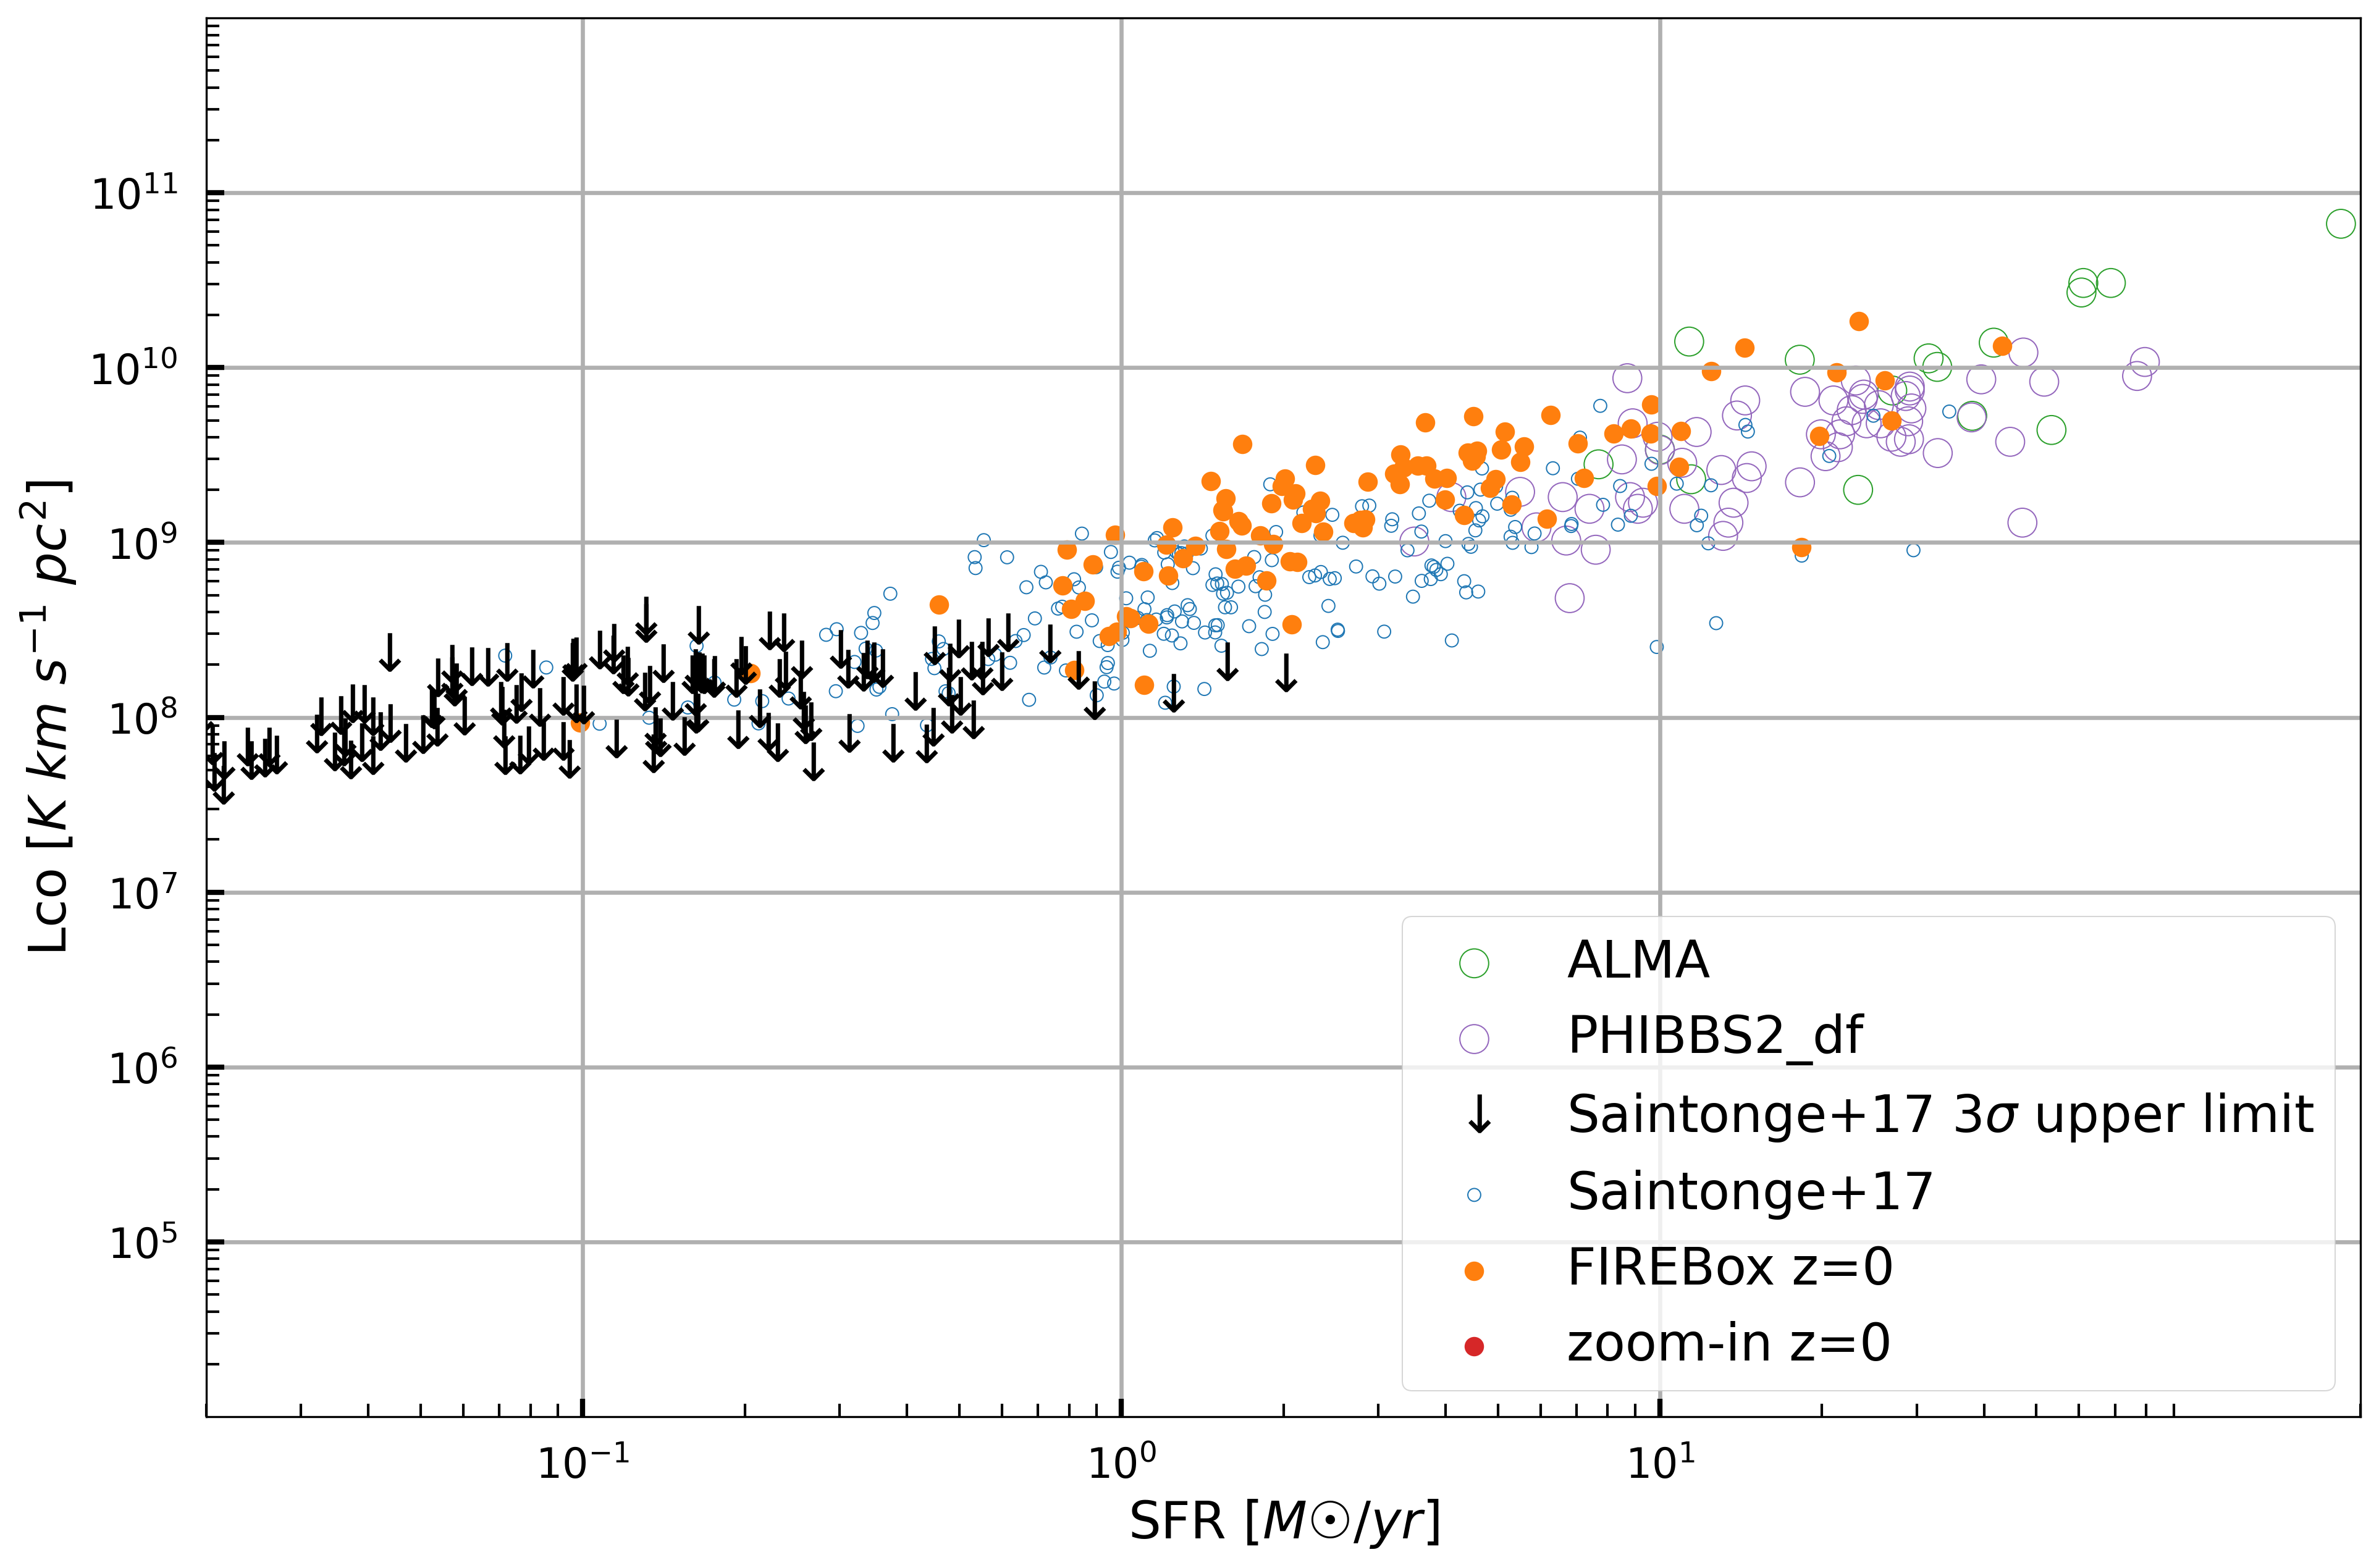

In [8]:
fig, ax = plt.subplots(figsize=(15, 10), dpi = 300, facecolor = "white")
fontsize=20
axes_number_size = 16

circle_size = 50


############ ALMA
ax.scatter(ALMA_df['SFR'], ALMA_df['Lco'], facecolors='none', edgecolors='tab:green', label='ALMA')

############ PHIBBS
ax.scatter(PHIBBS2_df['SFR'], PHIBBS2_df['Lco'], facecolors='none', edgecolors='tab:purple', label='PHIBBS2_df')

############ xCOLDGASS
boolean_1 = True 
boolean_2 = True 
for row, galaxy in XCOLDGASS_df.iterrows():
    if galaxy["Mstar"] > 1e10:
        if galaxy["FLAG_CO"] == 1:
            if boolean_1:
                ax.scatter(galaxy['SFR'], galaxy['Lco'], facecolors='none', edgecolors='tab:blue', s=circle_size/2, label="Saintonge+17")
                boolean_1 = False
            else:
                ax.scatter(galaxy['SFR'], galaxy['Lco'], facecolors='none', edgecolors='tab:blue', s=circle_size/2,)
        elif galaxy["FLAG_CO"] == 2:
            if boolean_2:
                plt.plot(galaxy['SFR'], galaxy['Lco'], marker=r"$\downarrow$", c="Black", linestyle='None', markersize=15, label=r"Saintonge+17 3$\sigma$ upper limit")
                boolean_2 = False
            else:
                plt.plot(galaxy['SFR'], galaxy['Lco'], marker=r"$\downarrow$", c="Black", linestyle='None', markersize=15)
                
    else:
        pass 


############ Laura
# ax.scatter(Laura_df["SFR"], Laura_df["Lco"], marker = '^', s=400, c = "Green", label = "Laura")

############ This work 


title = semi_analytical_runs['cf_1']['title']
data = z0_data

firebox_condition = data["galaxy_type"] == "firebox"
ax.scatter(
    data[firebox_condition]["sfr_10Myr"],
    data[firebox_condition][f"L_co_{title}"],
    s=circle_size, 
    c = "tab:Orange", 
    label = "FIREBox z=0"
)

zoom_in_condition = data["galaxy_type"] == "zoom_in"
ax.scatter(
    data[zoom_in_condition]["sfr_10Myr"],
    data[zoom_in_condition][f"L_co_{title}"],
    s=circle_size, 
    c = "tab:Red", 
    label = "zoom-in z=0"
)

###############################################################################################

plt.yscale("log")
plt.xscale("log")

plt.legend(fontsize="20", loc ="lower right", scatterpoints=1, numpoints=1)
# plt.grid(which = "minor")

plt.xlabel("SFR [$M☉/yr$]", fontsize = fontsize)
plt.ylabel("Lco [$K$ $km$ $s^{-1}$ $pc^2$]", fontsize = fontsize)

plt.ylim([1e4, 1e12])
plt.yticks([1e5, 1e6, 1e7, 1e8, 1e9, 1e10, 1e11])

plt.xlim([2e-2, 2e2])
plt.xticks([1e-1, 1e0, 1e1])


# # Customize major ticks
ax.tick_params(axis='both', which='major', labelsize=axes_number_size, length=7, width=2, colors='black', direction = "in")
ax.tick_params(axis='both', which='minor', labelsize=axes_number_size, length=5, width=1, colors='black', direction = "in")


plt.grid(True)
plt.show()

# fig.savefig("Lco.pdf", dpi=300)
# print("Figure saved")

Series([], Name: L_co_cf_1, dtype: float64)